<a href="https://colab.research.google.com/github/Fyodor-DOs/PCVK_02_Ahmed-Fathir-Syafaat/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NAMA  : AHMED FATHIR SYAFAAT
#KELAS : TI - 3H


## PRAKTIKUM

### 1. Import folder yang ada di Drive

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


### 2. Transformasi linier brightness

Formula: 𝑔(𝑥, 𝑦) = 𝑓(𝑥, 𝑦) + 𝑏

dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, dan b adalah
nilai brightness.

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


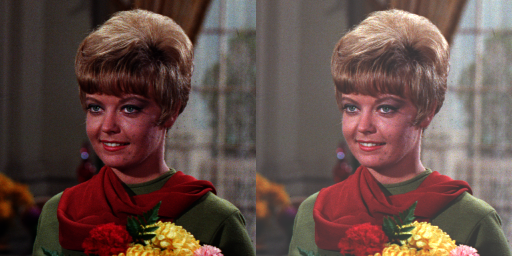

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

## TUGAS

### 1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori

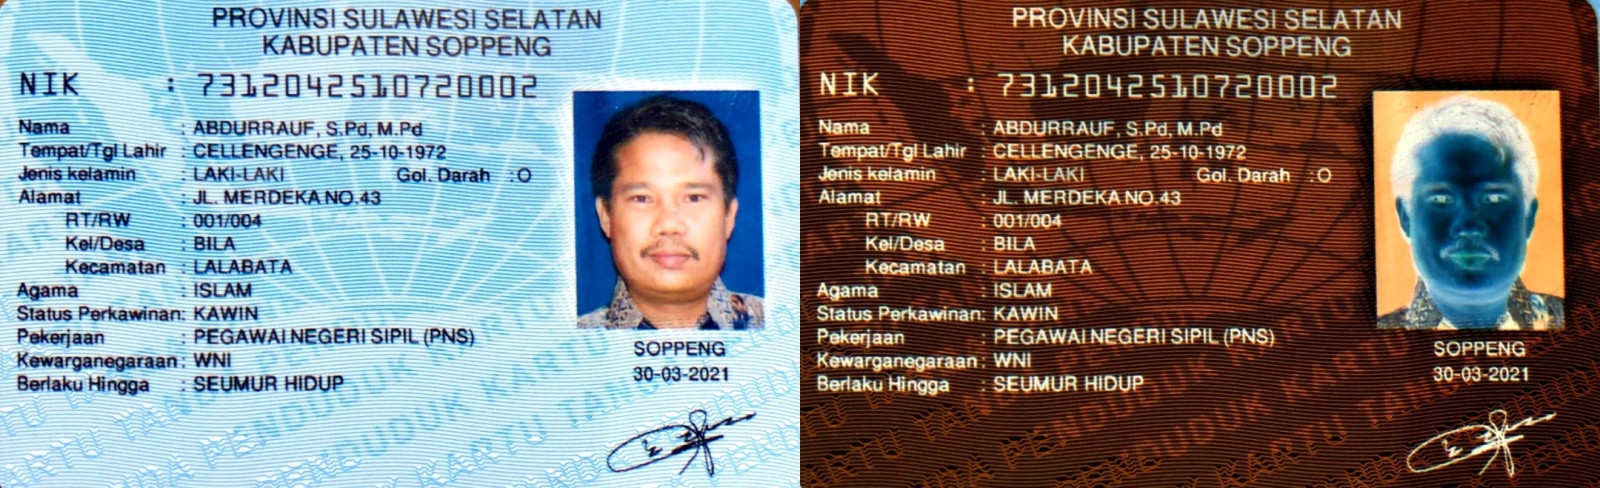

In [4]:
ktp = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpg')
inverted_ktp = np.zeros(ktp.shape, ktp.dtype)

for a in range(ktp.shape[0]):
  for b in range(ktp.shape[1]):
    for c in range(ktp.shape[2]):
      inverted_ktp[a,b,c] = np.clip(255 - ktp[a,b,c], 0, 255)

final_frame = cv.hconcat((ktp, inverted_ktp))
cv2_imshow(final_frame)

### 2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk kontras

Mengubah kontras dan tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan [-255 - 255]: 50
Masukkan nilai kontras [1.0 - 3.0]: 2


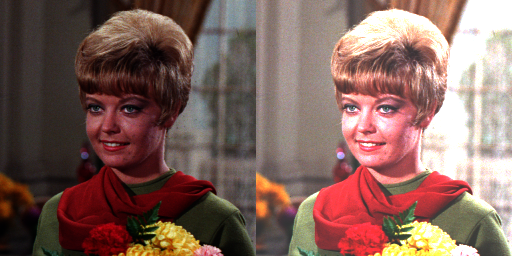

In [5]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
    contrast = int(input('Masukkan nilai kontras [1.0 - 3.0]: '))
except ValueError:
    print('Error, not a number')

female = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
contrast_brightness = np.zeros(female.shape, female.dtype)

for r in range(female.shape[0]):
  for g in range(female.shape[1]):
    for b in range(female.shape[2]):

      contrast_brightness[r, g, b] = np.clip(contrast * female[r, g, b] + brightness, 0, 255)


final_frame = cv.hconcat((female, contrast_brightness))
cv2_imshow(final_frame)

### 3. Implementasikan transformasi logarithmic brightness

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 50


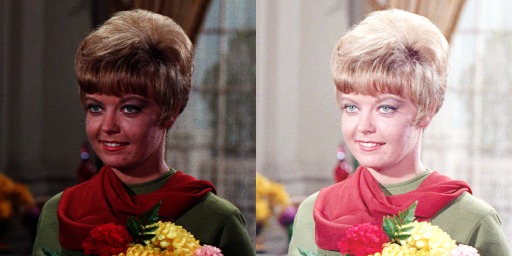

In [6]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

female = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
log_brightness = np.zeros(female.shape, female.dtype)

for r in range(female.shape[0]):
  for g in range(female.shape[1]):
    for b in range(female.shape[2]):
      log_brightness[r, g, b] = np.clip(brightness * np.log(1 + female[r, g, b]), 0, 255)

final_frame = cv.hconcat((female, log_brightness))
cv2_imshow(final_frame)

### 4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance

a. Averaging

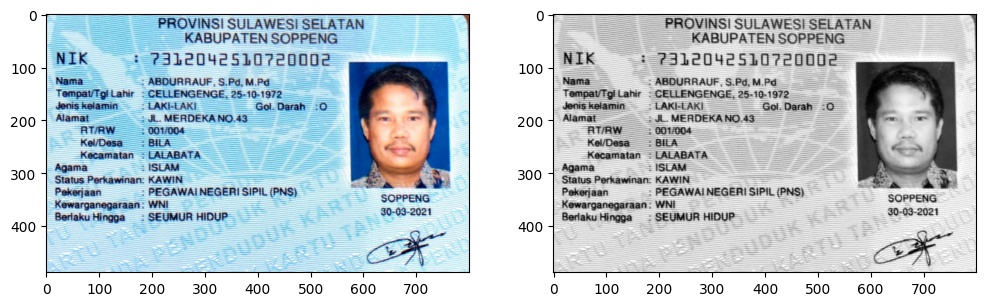

In [10]:
ktp = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpg')
grayscale_ktp = cv.cvtColor(ktp, cv.COLOR_BGR2GRAY)
fig, (original, gray_ktp) = plt.subplots(1, 2, figsize=(12, 5))

original.imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))
gray_ktp.imshow(grayscale_ktp, cmap='gray')

plt.show()

b. Lightness

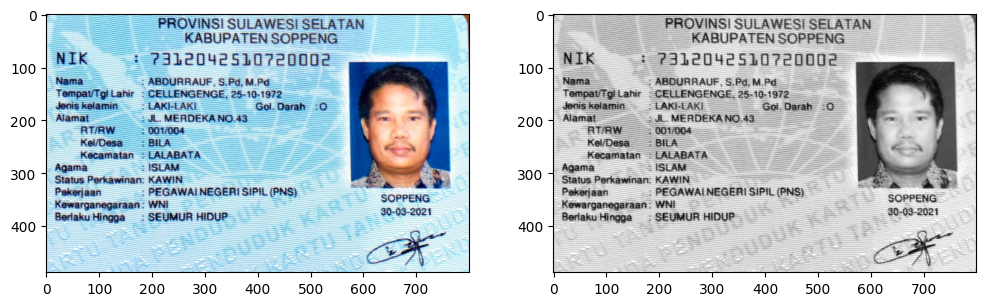

In [12]:
ktp = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpg')
lig_ktp = cv.cvtColor(ktp, cv.COLOR_BGR2HLS)
l_channel = lig_ktp[:, :, 1]
fig, (original, ltktp) = plt.subplots(1, 2, figsize=(12, 5))

original.imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))
ltktp.imshow(l_channel, cmap='gray')

plt.show()

c. Luminance

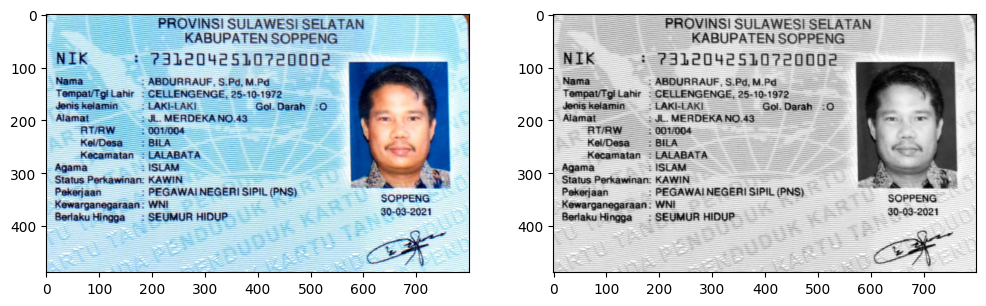

In [13]:
ktp = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpg')
lum_ktp = cv.cvtColor(ktp, cv.COLOR_BGR2YUV)
lu_channel = lum_ktp[:, :, 0]
fig, (original, lmktp) = plt.subplots(1, 2, figsize=(12, 5))

original.imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))
lmktp.imshow(lu_channel, cmap='gray')

plt.show()

### 5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale

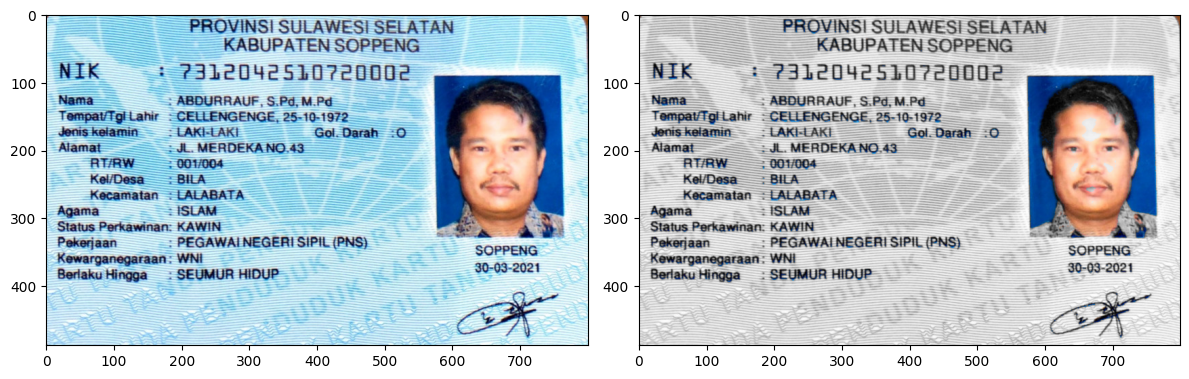

In [22]:
ktp = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpg')
ktp_hsv = cv.cvtColor(ktp, cv.COLOR_BGR2HSV)

lower_blue = np.array ([100, 180, 50])
upper_blue = np.array([140, 255, 255])

lower_red = np.array ([0, 50, 50])
upper_red = np.array([50, 255, 255])

mask_blue = cv.inRange(ktp_hsv, lower_blue, upper_blue)
mask_red = cv.inRange(ktp_hsv, lower_red, upper_red)

combined_mask = cv.bitwise_or(mask_blue, mask_red)
color_part = cv.bitwise_and(ktp, ktp, mask=combined_mask)

gray = cv.cvtColor(ktp, cv.COLOR_BGR2GRAY)
gray_colored = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

result = np.where (combined_mask[:, :, None] == 0, gray_colored, color_part)

fig, axs = plt.subplots (1, 2, figsize=(12,6))
axs[0].imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))
axs[1].imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.tight_layout()
plt.show()